In [1]:
import pandas as pd ##아나콘다에선 내장함수
import numpy as np

df= pd.read_csv('Lawn_mower.csv', index_col='index') ##index열을 index로 삼겠다.
df   #데이터프레임형식으로 불러옴

s_df=df.sort_values('income')    #정렬한 데이터프레임을 s_df에 넣어라  
income=np.array(s_df['income'])   #income 속성만 뽑아냄, 배열이 좋음.
income


array([ 33. ,  43.2,  47.4,  49.2,  51. ,  51. ,  52.8,  59.4,  60. ,
        61.5,  63. ,  64.8,  64.8,  66. ,  69. ,  75. ,  81. ,  82.8,
        84. ,  85.5,  87. ,  93. , 108. , 110.1])

In [2]:
income_center=[]
for i in range(len(income)):
    if i!=len(income)-1:
        income_center.append((income[i]+income[i+1])/2)
    else:
        income_center.append(income[-1])
        
s_df['income_center']=income_center
s_df

,income,Lot_size,Ownership,income_center
index,,,,
22,33.0,18.8,non-owner,38.10
16,43.2,20.4,non-owner,45.30
21,47.4,16.4,non-owner,48.30
18,49.2,17.6,non-owner,50.10
23,51.0,14.0,non-owner,51.00
11,51.0,22.0,owner,51.90
14,52.8,20.8,non-owner,56.10
19,59.4,16.0,non-owner,59.70
1,60.0,18.4,owner,60.75


In [3]:
import math
ownership = np.array(s_df['Ownership'])
ownership_list = list(set(ownership))
dic_top={}
dic_bottom={}
p_list_top=[]
p_list_bottom=[]
for i in range(len(ownership)-1):
    for key in ownership_list:
        dic_top[key]=0
        dic_bottom[key]=0
    tmp_list=list(dic_top.keys())
    #list1=1+i,list2=len(ownership)-list1
    
    for h in ownership[:i+1]:
        dic_top[h]=dic_top[h]+1
    if dic_top[tmp_list[1]]==0:
        p_list_top.append(0)
    else:
#         p_list_top.append(-(dic_top[ownership_list[0]]/(i+1))*\
#                           math.log2(dic_top[ownership_list[0]]/(i+1)+1e-7))

        p_list_top.append(1-(dic_top[ownership_list[0]]/(i+1))**2-\
                          (dic_top[ownership_list[1]]/(i+1))**2) 
                          
    for k in ownership[i+1:]:
        dic_bottom[k]=dic_bottom[k]+1

    if dic_bottom[tmp_list[1]]==0:
        p_list_bottom.append(0)
    else:
#         p_list_bottom.append(-(dic_bottom[ownership_list[0]]/(len(ownership)-(i+1)))*\
#                              math.log2(dic_bottom[ownership_list[0]]/(len(ownership)-(i+1))+1e-7))
                             
        p_list_bottom.append(1-(dic_bottom[ownership_list[0]]/(len(ownership)-(i+1)))**2\
                             -(dic_bottom[ownership_list[1]]/(len(ownership)-(i+1)))**2)
    print(dic_top,dic_bottom)

print(p_list_top,"\n")
print(p_list_bottom)


{'non-owner': 1, 'owner': 0} {'non-owner': 11, 'owner': 12}
{'non-owner': 2, 'owner': 0} {'non-owner': 10, 'owner': 12}
{'non-owner': 3, 'owner': 0} {'non-owner': 9, 'owner': 12}
{'non-owner': 4, 'owner': 0} {'non-owner': 8, 'owner': 12}
{'non-owner': 5, 'owner': 0} {'non-owner': 7, 'owner': 12}
{'non-owner': 5, 'owner': 1} {'non-owner': 7, 'owner': 11}
{'non-owner': 6, 'owner': 1} {'non-owner': 6, 'owner': 11}
{'non-owner': 7, 'owner': 1} {'non-owner': 5, 'owner': 11}
{'non-owner': 7, 'owner': 2} {'non-owner': 5, 'owner': 10}
{'non-owner': 7, 'owner': 3} {'non-owner': 5, 'owner': 9}
{'non-owner': 8, 'owner': 3} {'non-owner': 4, 'owner': 9}
{'non-owner': 9, 'owner': 3} {'non-owner': 3, 'owner': 9}
{'non-owner': 9, 'owner': 4} {'non-owner': 3, 'owner': 8}
{'non-owner': 10, 'owner': 4} {'non-owner': 2, 'owner': 8}
{'non-owner': 10, 'owner': 5} {'non-owner': 2, 'owner': 7}
{'non-owner': 11, 'owner': 5} {'non-owner': 1, 'owner': 7}
{'non-owner': 11, 'owner': 6} {'non-owner': 1, 'owner': 6}

In [4]:
entropy_list = []
for i in range(len(p_list_top)):
    entropy_list.append(p_list_top[i]*(i+1)/24+p_list_bottom[i]*(len(ownership)-(i+1))/24)
print("{}\n\nmin=={}, len=={}".format(entropy_list,min(entropy_list),len(entropy_list)))
print("division index=={}, division value=={}".format(entropy_list.index(min(entropy_list)),
      np.array(s_df['income_center'])[entropy_list.index(min(entropy_list))]))

[0.47826086956521746, 0.4545454545454546, 0.4285714285714286, 0.39999999999999997, 0.3684210526315789, 0.4259259259259259, 0.3949579831932773, 0.359375, 0.40740740740740733, 0.44285714285714284, 0.41258741258741255, 0.375, 0.41258741258741255, 0.3714285714285714, 0.40740740740740744, 0.359375, 0.39495798319327735, 0.4259259259259258, 0.368421052631579, 0.39999999999999997, 0.42857142857142866, 0.45454545454545464, 0.47826086956521746]

min==0.359375, len==23
division index==7, division value==59.7


In [5]:
from sklearn.datasets import load_iris

data = load_iris()
y_ownership=[]
for i in range(len(ownership)):
    if ownership[i]== 'owner':
        y_ownership.append(0)
    else:
        y_ownership.append(1)
y=y_ownership.copy()
#y = data.target
y

[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]

In [6]:
a = np.transpose(np.array(s_df['Lot_size']))
b=np.transpose(np.array(s_df['income']))
x_attr=[]
for i in range(len(a)):
    tmp=[]
    tmp.append(b[i])
    tmp.append(a[i])
    x_attr.append(tmp)

X = np.array(x_attr)#.copy()
X

array([[ 33. ,  18.8],
       [ 43.2,  20.4],
       [ 47.4,  16.4],
       [ 49.2,  17.6],
       [ 51. ,  14. ],
       [ 51. ,  22. ],
       [ 52.8,  20.8],
       [ 59.4,  16. ],
       [ 60. ,  18.4],
       [ 61.5,  20.8],
       [ 63. ,  14.8],
       [ 64.8,  17.2],
       [ 64.8,  21.6],
       [ 66. ,  18.4],
       [ 69. ,  20. ],
       [ 75. ,  19.6],
       [ 81. ,  20. ],
       [ 82.8,  22.4],
       [ 84. ,  17.6],
       [ 85.5,  16.8],
       [ 87. ,  23.6],
       [ 93. ,  20.8],
       [108. ,  17.6],
       [110.1,  19.2]])

In [7]:
feature_names = ['income','Lot_size']
#feature_names = ['Lot_size','income']
feature_names


['income', 'Lot_size']

In [8]:
from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier(criterion='gini', max_depth=1, random_state=0).fit(X, y)

In [9]:
#!pip install pydot

import os
os.environ["PATH"]+=os.pathsep+'C:/Program Files/Graphviz/bin'

In [10]:
#! pip install pydot
#! pip install graphviz

import io
import pydot
import graphviz
from IPython.core.display import Image
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import matplotlib as mpl

def draw_decision_tree(model):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)


def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors)

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = model.predict(
        np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)

    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=[cmap(idx)], marker=markers[idx], s=80, label=cl)

    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.legend(loc='upper left')
    plt.title(title)

    return Z

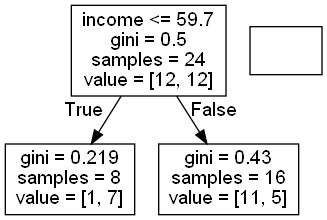

In [11]:
draw_decision_tree(tree1)

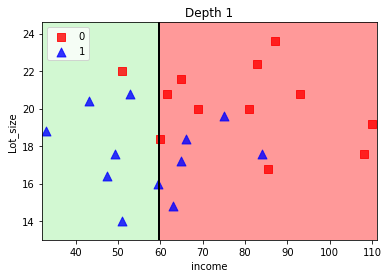

In [12]:
plot_decision_regions(X, y, tree1, "Depth 1")
plt.show()

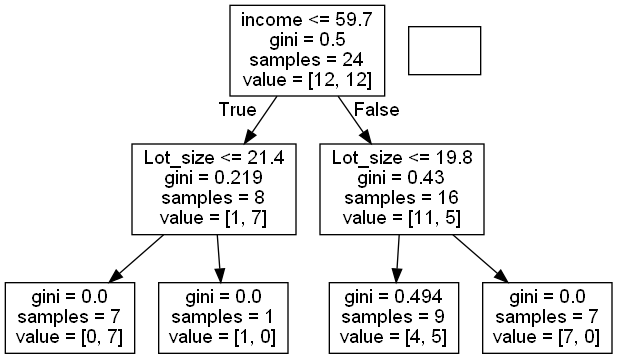

In [13]:
tree2 = DecisionTreeClassifier(
    criterion='gini', max_depth=2, random_state=0).fit(X, y)
draw_decision_tree(tree2)

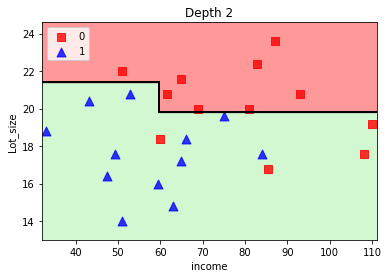

In [14]:
plot_decision_regions(X, y, tree2, "Depth 2")
plt.show()

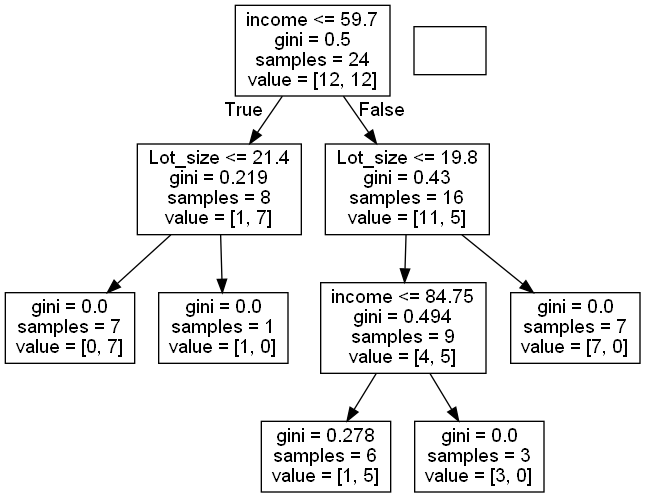

In [15]:
tree3 = DecisionTreeClassifier(
    criterion='gini', max_depth=3, random_state=0).fit(X, y)
draw_decision_tree(tree3)

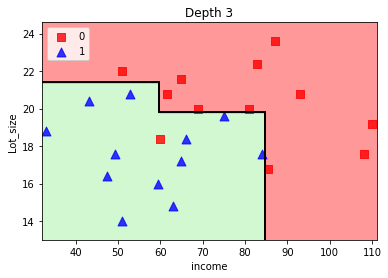

In [16]:
plot_decision_regions(X, y, tree3, "Depth 3")
plt.show()

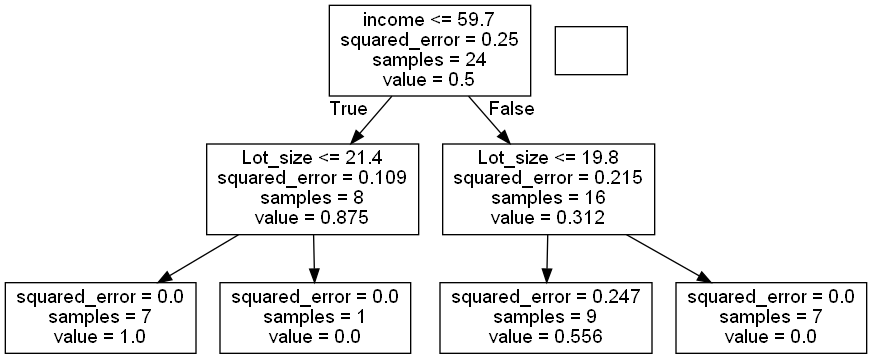

In [17]:
from sklearn.tree import DecisionTreeRegressor
repr_1=DecisionTreeRegressor(max_depth=2)
repr_1.fit(X,y)
draw_decision_tree(repr_1)

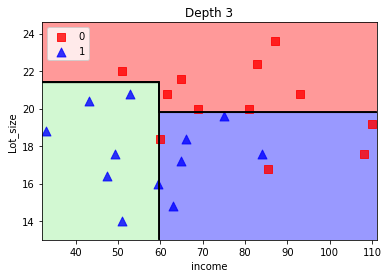

In [18]:
plot_decision_regions(X,y,repr_1,"Depth 3")
plt.show()